<a href="https://colab.research.google.com/github/TristanDelgado/Intro-To-Machine-Learning/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning CS-4410-XTIA Homework 2

15.8 (CLASSIFICATION WITH THE IRIS DATASET: HYPERPARAMETER TUNING) Using scikit-learn’s KFold class and cross_val_score function, determine the optimal k value for classifying Iris samples using a KNeighborsClassifier.

##Instructions

Ex 15.8 Classification with the Iris Dataset: Hyperparameter Turning.

1. You can just load Iris dataset available in sklearn.datasets.



2. Using scikit-learn's cross_val_score(cv=10) which means 10 fold cross-validation.

  This time we don't use the following book codes in page 619:

  kfold = KFold(n_splits=10, random_state=11, shuffle=True)

  scores = cross_val_score(estimator=knn, X=iris.data,
     y=iris.target, cv=kfold)


  If you use cv=kfold, the optimal k=11.

  So use the following for Hyperparameter Turning:

  k_range = range(1, 31)

  for k in k_range:  
    knn = KNeighborsClassifier(n_neighbors=k)  
    scores = cross_val_score(knn, X, y, cv=10)

3. Determine the optimal k value (k range from 1 to 31) and plot  'Value of K for KNN' vs.  'Cross-Validated Accuracy'. Show the following two graphs: (In Textbook)

4. Use GridSearchCV to confirm k=13 has the optimal parameter.

##Solutions

In [70]:
#Task 1: Importing the data
from sklearn.datasets import load_iris

iris = load_iris()

In [71]:
#Task 2:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k_range = range(1, 31)
scores = {}
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores[k] = np.mean(cross_val_score(knn, iris.data, iris.target, cv=10))
print(scores)

{1: 0.96, 2: 0.9533333333333334, 3: 0.9666666666666666, 4: 0.9666666666666666, 5: 0.9666666666666668, 6: 0.9666666666666668, 7: 0.9666666666666668, 8: 0.9666666666666668, 9: 0.9733333333333334, 10: 0.9666666666666668, 11: 0.9666666666666668, 12: 0.9733333333333334, 13: 0.9800000000000001, 14: 0.9733333333333334, 15: 0.9733333333333334, 16: 0.9733333333333334, 17: 0.9733333333333334, 18: 0.9800000000000001, 19: 0.9733333333333334, 20: 0.9800000000000001, 21: 0.9666666666666666, 22: 0.9666666666666666, 23: 0.9733333333333334, 24: 0.96, 25: 0.9666666666666666, 26: 0.96, 27: 0.9666666666666666, 28: 0.9533333333333334, 29: 0.9533333333333334, 30: 0.9533333333333334}


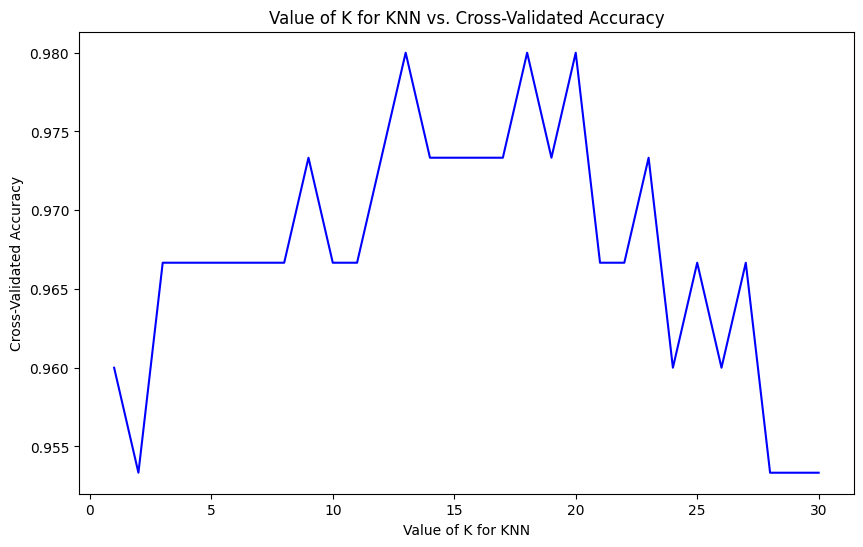

In [72]:
#Task 3:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(k_range, scores.values(),  color='blue')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

plt.show()

In [73]:
#Task 4:
from sklearn.model_selection import GridSearchCV
import pandas as pd

paramGrid = { "n_neighbors" : range(1, 31) }

knn = KNeighborsClassifier(n_neighbors=13)
grid_search = GridSearchCV(knn, paramGrid, cv=10, scoring="accuracy")
grid_search.fit(iris.data, iris.target)
grid_search.best_params_

{'n_neighbors': 13}